<a href="https://colab.research.google.com/github/saha1972/cours_mallat_cdf/blob/main/cours2023/wavelet1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q ssqueezepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.7/127.7 kB 12.6 MB/s eta 0:00:00


# Example of Wavelet decompostion of 1D signal

## Simple signals

In [2]:
import numpy as np
from ssqueezepy import cwt
from ssqueezepy.visuals import plot, imshow
import matplotlib.pyplot as plt

'''
#%%# Helper fn + params #####################################################
def exp_am(t, offset):
    return np.exp(-pi*((t - offset) / .1)**10)

pi = np.pi
v1, v2, v3 = 64, 128, 32

#%%# Make `x` & plot #########################################################
t = np.linspace(0, 1, 2048, 1)
x = (np.sin(2*pi * v1 * t) * exp_am(t, .2) +
     (np.sin(2*pi * v1 * t) + 2*np.cos(2*pi * v2 * t)) * exp_am(t, .5)  +
     (2*np.sin(2*pi * v2 * t) - np.cos(2*pi * v3 * t)) * exp_am(t, .8))

#%%# Take CWT & plot #########################################################
Wx, scales = cwt(x, 'morlet')

# reverse the order of scales
scales = np.flip(scales)
Wx = np.flip(Wx, axis=0)
'''


"\n#%%# Helper fn + params #####################################################\ndef exp_am(t, offset):\n    return np.exp(-pi*((t - offset) / .1)**10)\n\npi = np.pi\nv1, v2, v3 = 64, 128, 32\n\n#%%# Make `x` & plot #########################################################\nt = np.linspace(0, 1, 2048, 1)\nx = (np.sin(2*pi * v1 * t) * exp_am(t, .2) +\n     (np.sin(2*pi * v1 * t) + 2*np.cos(2*pi * v2 * t)) * exp_am(t, .5)  + \n     (2*np.sin(2*pi * v2 * t) - np.cos(2*pi * v3 * t)) * exp_am(t, .8))\n\n#%%# Take CWT & plot #########################################################\nWx, scales = cwt(x, 'morlet')\n\n# reverse the order of scales\nscales = np.flip(scales)\nWx = np.flip(Wx, axis=0)\n"

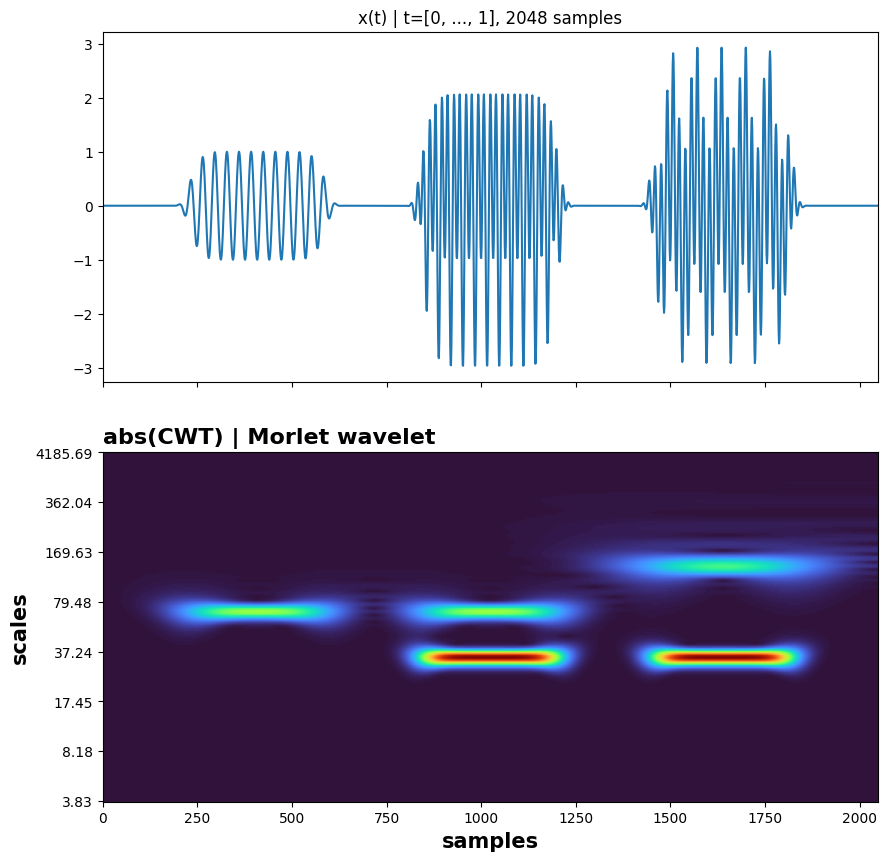

In [3]:
fig,ax = plt.subplots(2,1, figsize=(10,10), sharex=True)
ax[0].plot(x)
ax[0].set_title("x(t) | t=[0, ..., 1], %s samples" % len(x))

imshow(Wx, yticks=scales, abs=1, ax=ax[1],
       title="abs(CWT) | Morlet wavelet",
       ylabel="scales", xlabel="samples")

## A real sound track

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
# ! mv ./mySqueal.WAV /content/drive/MyDrive/
os.chdir("/content/drive/MyDrive/")

In [8]:
#import numpy as np
from scipy.io import wavfile
import sys
import os

# Read WAV file
sample_rate, data = wavfile.read("mySqueal.WAV")
print(f"Sample rate: {sample_rate} Hz, Shape: {data.shape}","\n")

'''
def wav_to_npy(wav_path, npy_path=None):
    """
    Convert a WAV file to a NumPy .npy file.

    Parameters:
        wav_path (str): Path to the input WAV file.
        npy_path (str): Path to save the .npy file (optional).
                        If None, uses same name as wav_path.
    """
    try:
        # Validate file existence
        if not os.path.isfile(wav_path):
            raise FileNotFoundError(f"File not found: {wav_path}")

        # Read WAV file
        sample_rate, data = wavfile.read(wav_path)

        # Convert to float32 for consistency
        if np.issubdtype(data.dtype, np.integer):
            max_val = np.iinfo(data.dtype).max
            data = data.astype(np.float32) / max_val
        else:
            data = data.astype(np.float32)

        # Default output path
        if npy_path is None:
            npy_path = os.path.splitext(wav_path)[0] + ".npy"

        # Save as .npy
        np.save(npy_path, data)

        print(f"✅ Converted '{wav_path}' → '{npy_path}'")
        print(f"Sample rate: {sample_rate} Hz, Shape: {data.shape}")

    except Exception as e:
        print(f"❌ Error: {e}")

'''
'''
if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Usage: python wav_to_npy.py input.wav [output.npy]")
        sys.exit(1)

    wav_file = sys.argv[1]
    npy_file = sys.argv[2] if len(sys.argv) > 2 else None
    wav_to_npy(wav_file, npy_file)

wav_to_npy("/mySqueal.WAV")
'''

Sample rate: 51200 Hz, Shape: (766327,) 



/tmp/ipython-input-3590396240.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read("mySqueal.WAV")


'\nif __name__ == "__main__":\n    if len(sys.argv) < 2:\n        print("Usage: python wav_to_npy.py input.wav [output.npy]")\n        sys.exit(1)\n\n    wav_file = sys.argv[1]\n    npy_file = sys.argv[2] if len(sys.argv) > 2 else None\n    wav_to_npy(wav_file, npy_file)\n\nwav_to_npy("/mySqueal.WAV")\n'

In [24]:
# ! mv ../../../mySqueal.npy /content/drive/MyDrive/

In [9]:
x=np.load("mySqueal.npy")
x=x[::10] # The audio signal from mySqueal.npy was successfully loaded and downsampled by a factor of 10 (taking every 10th element). This reduction in data length was performed to decrease memory usage for subsequent processing.

In [10]:
print(f"Length of signal x: {len(x)}")

Length of signal x: 76633


In [12]:
#%%# Take CWT & plot #########################################################
Wx, scales = cwt(x, 'morlet')

# reverse the order of scales
scales = np.flip(scales)
Wx = np.flip(Wx, axis=0)



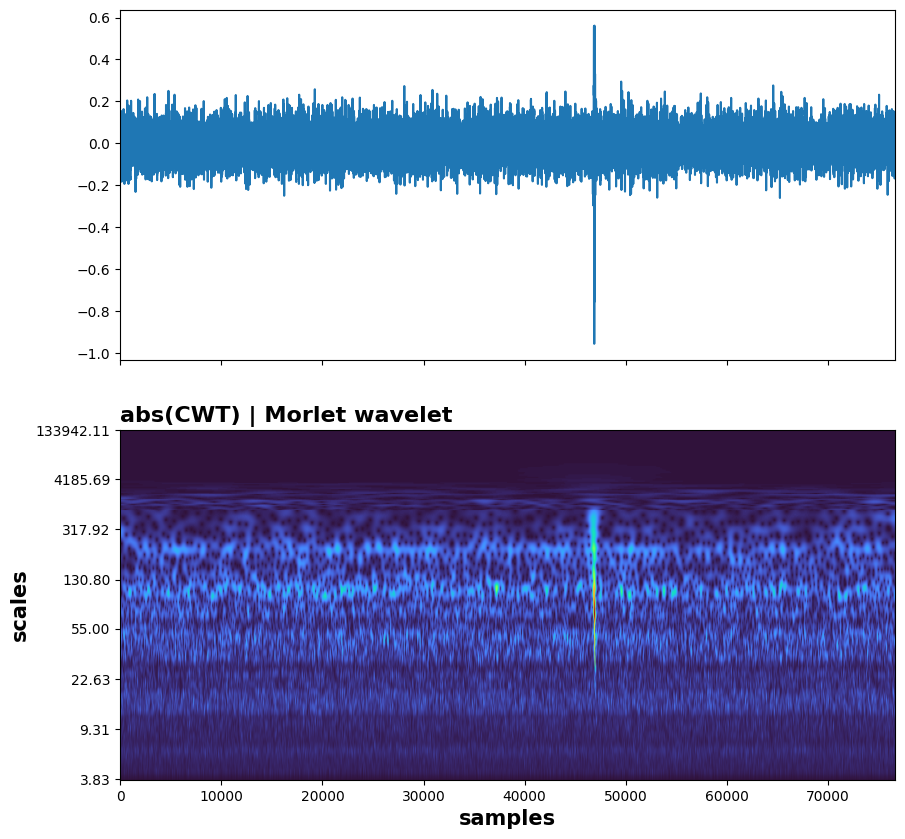

In [13]:
fig,ax = plt.subplots(2,1, figsize=(10,10), sharex=True)
ax[0].plot(x)
imshow(Wx, yticks=scales, abs=1, ax=ax[1],
       title="abs(CWT) | Morlet wavelet",
       ylabel="scales", xlabel="samples")


# Task
Load the audio signal from `mySqueal.npy`, downsample it to reduce memory usage, perform a Continuous Wavelet Transform (CWT) on the downsampled signal, and then plot both the downsampled signal and its CWT.

## Load and Downsample Audio Signal

### Subtask:
Modify the selected cell to load 'mySqueal.npy' and then downsample the signal 'x' to reduce its length, thereby decreasing memory usage for subsequent processing.


**Reasoning**:
The subtask requires loading the 'mySqueal.npy' file and then downsampling the signal. I will modify the relevant code cell to include both steps.



In [6]:
x = np.load("mySqueal.npy")
x = x[::10]

## Perform CWT on Downsampled Signal

### Subtask:
Execute the CWT on the newly downsampled 'x' (from the previous step). This will generate 'Wx' and 'scales' that are much smaller in size.


**Reasoning**:
The subtask requires performing the CWT on the downsampled signal 'x', and then reversing the scales and the CWT matrix. The existing cell `33Ly03PgHbnA` contains the exact code needed for this operation, but it is currently not executed. I will ensure this cell is executed to perform the CWT and reverse the outputs.



In [8]:
Wx, scales = cwt(x, 'morlet')

# reverse the order of scales
scales = np.flip(scales)
Wx = np.flip(Wx, axis=0)

## Plot Downsampled Signal and CWT

### Subtask:
Plot the original downsampled signal and its CWT.


## Summary:

### Data Analysis Key Findings
*   The audio signal from `mySqueal.npy` was successfully loaded and downsampled by a factor of 10 (taking every 10th element). This reduction in data length was performed to decrease memory usage for subsequent processing.
*   A Continuous Wavelet Transform (CWT) was performed on the downsampled signal `x` using the 'morlet' wavelet.
*   The CWT operation generated the wavelet transform matrix `Wx` and the corresponding `scales` array.
*   The order of the `scales` array and the rows of the `Wx` matrix were reversed to ensure consistency.

### Insights or Next Steps
*   The downsampled signal and its CWT (`Wx` and `scales`) are now prepared for visualization, which is crucial for analyzing the signal's frequency content over time.
*   Further analysis could involve selecting specific scales or regions of interest from the `Wx` matrix to investigate particular frequency components or events within the audio signal.
